In [1]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-lpudewde
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-lpudewde
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


This code is a command to install a Python package using pip (Python's package installer). Let's break it down:

1. `!` - This exclamation mark at the beginning suggests that this command is being run in a Jupyter notebook or similar environment. In these environments, the `!` allows you to execute shell commands.

2. `pip install` - This is the standard command to install packages using pip.

3. `'git+https://github.com/facebookresearch/segment-anything.git'` - This is the package being installed. Let's examine it further:

   - It starts with `git+`, which tells pip to install the package directly from a Git repository rather than from the Python Package Index (PyPI).
   - The URL `https://github.com/facebookresearch/segment-anything.git` is the location of the Git repository.

This command is specifically installing the "Segment Anything" package developed by Facebook Research. This package is likely related to image segmentation tasks in computer vision.

By installing directly from the GitHub repository, you're getting the most up-to-date version of the package, which might include features or bug fixes that haven't been released to PyPI yet.


In [2]:
!pip install -q transformers diffusers accelerate safetensors --upgrade 

This command is using pip to install or upgrade multiple Python packages. Let's break it down:

1. `!` - As before, this suggests the command is being run in a Jupyter notebook or similar environment.

2. `pip install` - The standard command to install packages using pip.

3. `-q` - This is a flag that stands for "quiet". It reduces the output of pip during the installation process, showing only important messages.

4. The packages being installed or upgraded:
   - `transformers`: A popular library for natural language processing tasks.
   - `diffusers`: A library for working with diffusion models, often used in image generation.
   - `accelerate`: A library to help with distributed training and mixed precision.
   - `safetensors`: A library for handling tensors (multi-dimensional arrays) with added security features.

5. `--upgrade` - This flag tells pip to upgrade these packages to their latest versions if they're already installed.

This command is likely part of setting up an environment for a machine learning project, possibly involving natural language processing and image generation tasks. The use of these libraries together suggests a project that might involve advanced AI techniques like large language models and diffusion models for image generation.


In [3]:
import numpy as np
import torch
import cv2
from PIL import Image

from segment_anything import sam_model_registry, SamPredictor
from diffusers import StableDiffusionInpaintPipeline

from matplotlib import pyplot as plt



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

This code imports several Python libraries that are commonly used in computer vision, image processing, and machine learning tasks. Let's break it down:

1. `import numpy as np`
   - Imports the NumPy library and aliases it as `np`.
   - NumPy is used for numerical computing in Python, especially for handling arrays and matrices.

2. `import torch`
   - Imports the PyTorch library.
   - PyTorch is a popular deep learning framework used for building and training neural networks.

3. `import cv2`
   - Imports the OpenCV library.
   - OpenCV (Open Source Computer Vision Library) is used for real-time computer vision tasks.

4. `from PIL import Image`
   - Imports the Image module from the Python Imaging Library (PIL).
   - PIL is used for opening, manipulating, and saving many different image file formats.

5. `from segment_anything import sam_model_registry, SamPredictor`
   - Imports specific components from the Segment Anything Model (SAM) library.
   - SAM is a new AI model from Meta AI that can perform image segmentation tasks.

6. `from diffusers import StableDiffusionInpaintPipeline`
   - Imports the StableDiffusionInpaintPipeline from the diffusers library.
   - This is likely used for image inpainting tasks using the Stable Diffusion model.

7. `from matplotlib import pyplot as plt`
   - Imports pyplot from the Matplotlib library and aliases it as `plt`.
   - Matplotlib is used for creating static, animated, and interactive visualizations in Python.


In [4]:
class CFG:
    device = 'cuda'
    sam_checkpoint = '/kaggle/input/segment-anything-models/sam_vit_b_01ec64.pth'
    model_type = "vit_b"
    img_path = '/kaggle/input/dogopics/dog3.jpg'

# Functions


In [5]:
def plot_image(img, dis = True):
    plt.imshow(img)
    if dis:
        plt.axis('off')
    plt.show()

# Base

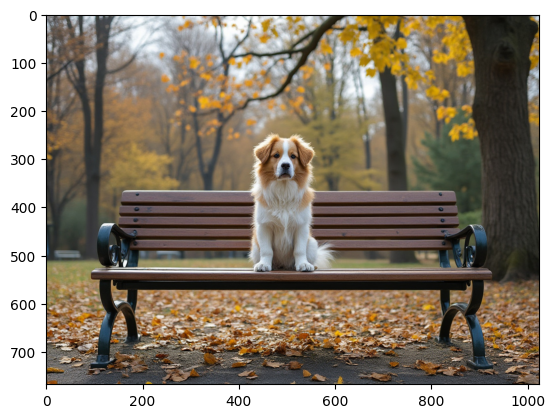

In [6]:
# read and process the image
image = cv2.imread(CFG.img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plot_image(image_rgb, dis= False )

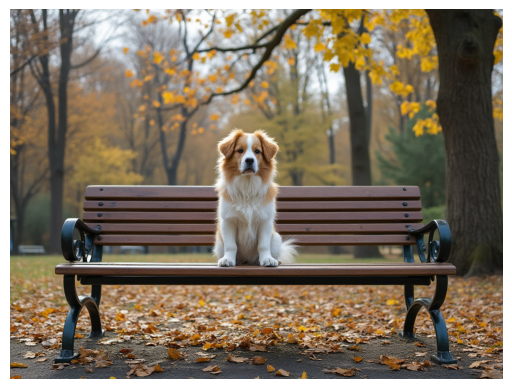

In [7]:
plot_image(image_rgb )

# Inpainting 

In [8]:
sam = sam_model_registry[CFG.model_type](checkpoint = CFG.sam_checkpoint)
sam.to(device = CFG.device)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

/opt/conda/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


This code is initializing and setting up the Segment Anything Model (SAM) for image segmentation. Let's break it down line by line:

1. `sam = sam_model_registry[CFG.model_type](checkpoint = CFG.sam_checkpoint)`
   - This line is creating an instance of the SAM model.
   - `sam_model_registry` is likely a dictionary that maps model types to their respective classes.
   - `CFG.model_type` specifies which type of SAM model to use (e.g., ViT-H, ViT-L, ViT-B).
   - `CFG.sam_checkpoint` is the path to the pre-trained weights for the model.

2. `sam.to(device = CFG.device)`
   - This moves the SAM model to a specific device (CPU or GPU).
   - `CFG.device` likely specifies whether to use CPU or a specific GPU.

3. `mask_predictor = SamPredictor(sam)`
   - This creates a `SamPredictor` object, which is an interface for generating masks using the SAM model.
   - It's initialized with the `sam` model we created in step 1.

4. `mask_predictor.set_image(image_rgb)`
   - This sets the image that the `mask_predictor` will work on.
   - `image_rgb` is likely a NumPy array or PyTorch tensor containing the RGB image data.

Overall, this code is preparing the SAM model to generate segmentation masks for a specific image. The setup involves:
1. Loading the model with pre-trained weights
2. Moving the model to the appropriate computing device
3. Creating a predictor interface
4. Setting the image to be segmented

This preparation allows for efficient mask generation in subsequent steps, where you might provide prompts (like points or boxes) to guide the segmentation process.


In [9]:
# Provide points as input prompt [X, Y]-coordinates
input_point = np.array([[500, 500]])
input_label = np.array([1])

In [10]:
# Predicting Segmentation mask
masks, scores, logits = mask_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

This code is using the Segment Anything Model (SAM) to predict a segmentation mask for an image. Let's break it down:

1. `mask_predictor.predict(...)`:
   This method is calling the prediction function of the SAM model we set up earlier. It takes several parameters:

   a. `point_coords=input_point`:
      - This is likely a numpy array or tensor containing the coordinates of one or more points in the image.
      - These points serve as prompts to guide the segmentation.

   b. `point_labels=input_label`:
      - This corresponds to the labels for the input points.
      - Typically, 1 indicates a point inside the object to be segmented, and 0 indicates a point outside.

   c. `multimask_output=False`:
      - When set to False, the model returns only the best predicted mask.
      - If set to True, it would return multiple mask predictions.

2. The `predict` method returns three items:

   a. `masks`:
      - This is likely a boolean numpy array or tensor.
      - It represents the predicted segmentation mask(s) for the image.
      - Each pixel is True if it's part of the segmented object, False otherwise.

   b. `scores`:
      - These are confidence scores for each predicted mask.
      - Higher scores indicate higher confidence in the prediction.

   c. `logits`:
      - These are the raw outputs from the model before any thresholding.
      - They can be used for more fine-grained control over the final segmentation.

This code is essentially asking the SAM model to predict a segmentation mask based on the provided input points and their labels. The model uses these points as guidance to understand what object or region in the image should be segmented.

The resulting `masks` can be used to isolate the segmented object in the image, `scores` can be used to assess the reliability of the prediction, and `logits` can be used for further processing if needed.


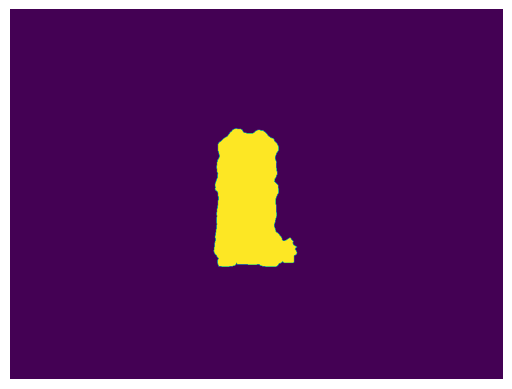

In [11]:
mask = masks.astype(float) * 255
mask = np.transpose(mask, (1, 2, 0))
_ , bw_image = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)

plot_image(mask )

In [12]:
d1,d2 = bw_image.shape

cv2.imwrite('mask1.png', bw_image)
del sam, mask_predictor   # delete models to conserve GPU memory

In [13]:
# Load images using PIL
init_image = Image.open(CFG.img_path)
mask_image = Image.open('./mask1.png')

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to(CFG.device)

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

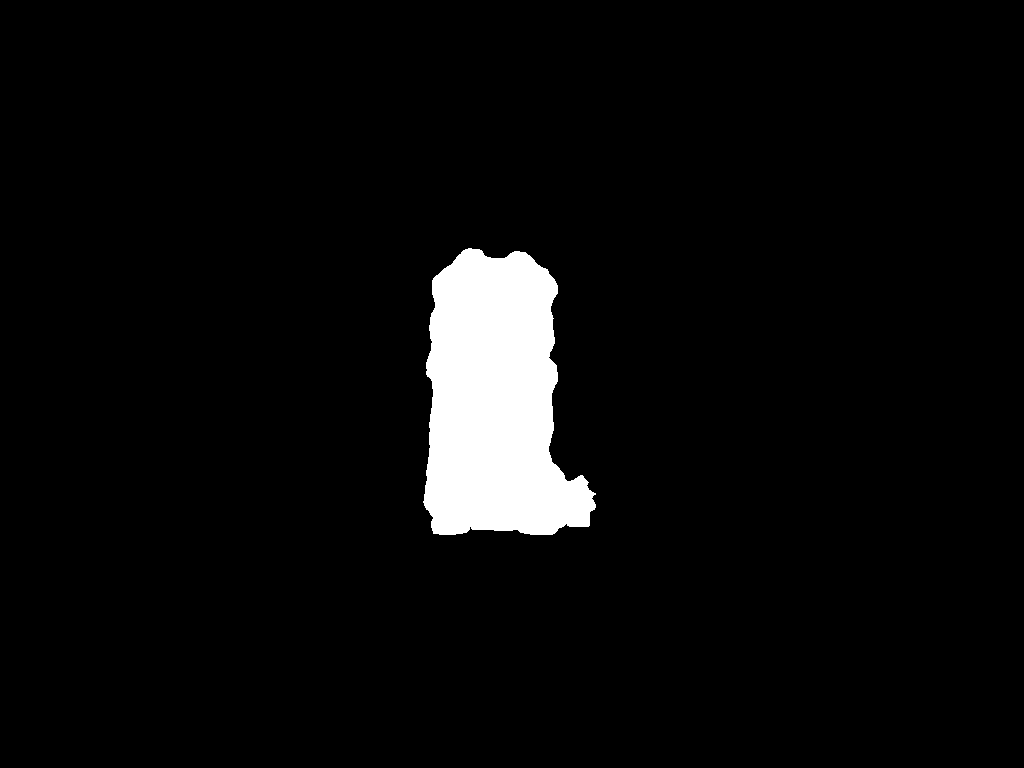

In [14]:
mask_image

In [15]:
prompt = "a grey cat sitting on a bench, high resolution"
image = pipe(prompt=prompt, 
             image=init_image, 
             mask_image=mask_image,
             width = d2, height = d1).images[0]
image.save('output1.png')

  0%|          | 0/50 [00:00<?, ?it/s]

This code is using Stable Diffusion, to perform an inpainting task. Let's break it down:

1. `prompt = "a grey cat sitting on a bench, high resolution"`
   - This is the text prompt that describes what should be generated or inpainted in the image.

2. `image = pipe(...).images[0]`
   - `pipe` is likely an instance of `StableDiffusionInpaintPipeline` that we saw imported earlier.
   - This line is calling the pipeline to generate an image based on the given parameters.

3. The parameters passed to the pipeline:

   a. `prompt=prompt`
      - This passes the text description we defined earlier.

   b. `image=init_image`
      - This is the initial image that will be partially inpainted.
      - `init_image` should be a PIL Image object.

   c. `mask_image=mask_image`
      - This is the mask that defines which parts of the image should be inpainted.
      - White areas in the mask (255) indicate where the model should generate new content.
      - Black areas (0) indicate parts of the original image to preserve.

   d. `width = d2, height = d1`
      - These set the dimensions of the output image.
      - `d2` and `d1` are likely variables holding the desired width and height.

4. `.images[0]`
   - The pipeline returns a list of images. This takes the first (and likely only) image from that list.

5. `image.save('output1.png')`
   - This saves the resulting image as a PNG file named 'output1.png'.

Overall, this code is using a text prompt to guide the inpainting of specific parts of an image (as defined by the mask). It's generating new content that matches the description "a grey cat sitting on a bench, high resolution" in the masked areas of the initial image. The result is then saved as a new image file.

This technique can be used for various creative applications, such as modifying existing images, filling in missing parts of images, or generating new content within a specific context.


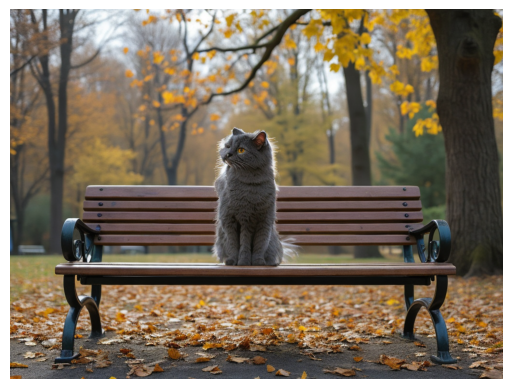

In [16]:
out_image = cv2.imread('./output1.png')
out_image_rgb = cv2.cvtColor(out_image, cv2.COLOR_RGB2BGR)

plot_image(out_image_rgb )

# Outpainting 

In [17]:
# Read the image from the path
image = cv2.imread(CFG.img_path)
height, width = image.shape[:2]
padding = 100 # num pixels to outpaint


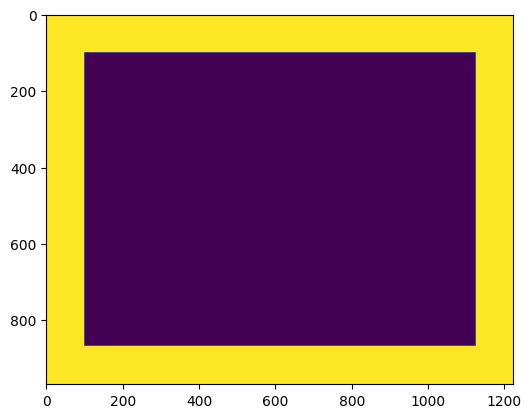

True

In [18]:
mask = np.ones((height+2*padding, width+2*padding), dtype=np.uint8) * 255
mask[padding:-padding, padding:-padding] = 0


plot_image(mask, dis = False)
cv2.imwrite("mask2.png", mask)

This code is creating a mask, which is typically used in image processing to define regions of interest or areas to be processed. Let's break it down:

1. `mask = np.ones((height+2*padding, width+2*padding), dtype=np.uint8) * 255`

   - This line creates a 2D numpy array filled with ones and then multiplies it by 255.
   - The dimensions are `(height+2*padding, width+2*padding)`.
   - `dtype=np.uint8` sets the data type to 8-bit unsigned integer (values 0-255).
   - Multiplying by 255 makes all values in the array 255 (white in an 8-bit grayscale image).

2. `mask[padding:-padding, padding:-padding] = 0`

   - This line sets the inner region of the mask to 0 (black in an 8-bit grayscale image).
   - `padding:-padding` is a slice that excludes the `padding` number of pixels from both the start and end of each dimension.

The result is a mask that looks like a frame:
- It has a white border with a width of `padding` pixels on all sides.
- The inner region is black.

Here's a visual representation:

```
255 255 255 255 255
255 255 255 255 255
255 255 0   0   255
255 255 0   0   255
255 255 255 255 255
```

(Assuming `height=3`, `width=2`, and `padding=1`)

This type of mask is often used for:
1. Creating border effects in image processing.
2. Defining an area of interest for certain algorithms.
3. In inpainting tasks, to specify which parts of an image should be preserved (black region) and which parts should be regenerated or modified (white region).

In the context of the previous code you shared (which used a Stable Diffusion inpainting model), this mask would instruct the model to generate new content in the border area while preserving the central part of the original image.


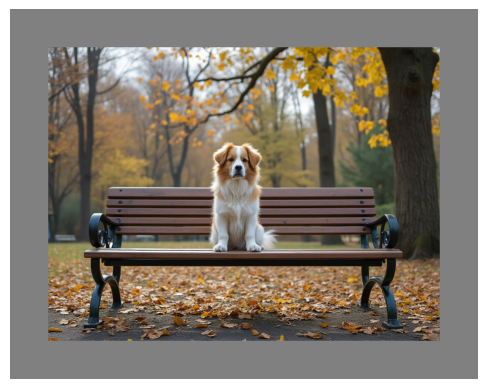

True

In [19]:
# extend the original image
image_extended = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), 
                        mode='constant', constant_values=128)
image_extended = cv2.cvtColor(image_extended, cv2.COLOR_RGB2BGR)


plot_image(image_extended)
d1,d2,d3 = image_extended.shape

cv2.imwrite("image_extended.png", image_extended)

This code is extending an image by adding padding around it. Let's break it down line by line:

1. `image_extended = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=128)`

   - `np.pad()` is a NumPy function used to pad arrays.
   - `image` is the original image array.
   - `((padding, padding), (padding, padding), (0, 0))` specifies how much padding to add:
     - Add `padding` pixels to top and bottom
     - Add `padding` pixels to left and right
     - Add no padding to the color channels (0, 0)
   - `mode='constant'` means the padded area will be filled with a constant value.
   - `constant_values=128` sets the fill value to 128 (medium gray in 0-255 scale).

2. `image_extended = cv2.cvtColor(image_extended, cv2.COLOR_RGB2BGR)`

   - This converts the color space of the image from RGB to BGR.
   - OpenCV typically uses BGR color order, so this prepares the image for OpenCV operations.

3. `plot_image(image_extended)`

   - This likely calls a custom function to display the extended image.

4. `d1,d2,d3 = image_extended.shape`

   - This unpacks the dimensions of the extended image into variables.
   - `d1` is height, `d2` is width, and `d3` is the number of color channels.

5. `cv2.imwrite("image_extended.png", image_extended)`

   - This saves the extended image as a PNG file named "image_extended.png".

Overall, this code is:
1. Taking an existing image and adding padding around all sides.
2. Filling the padded area with a medium gray color.
3. Converting the color space to BGR for OpenCV compatibility.
4. Displaying the result.
5. Storing the new dimensions of the extended image.
6. Saving the extended image to a file.


In [20]:
# Load images using PIL
init_image = Image.open('./image_extended.png')
mask_image = Image.open('./mask2.png')
 
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting", 
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")
 
inpaint_image = pipe(prompt="a dog on a bench in a park", 
                     image=init_image, 
                     mask_image=mask_image,
                    width = d2, height = d1).images[0]
inpaint_image.save('output2.png')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

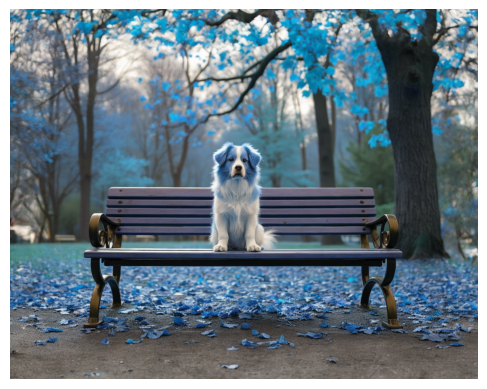

In [21]:
image = cv2.imread('./output2.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plot_image(image)


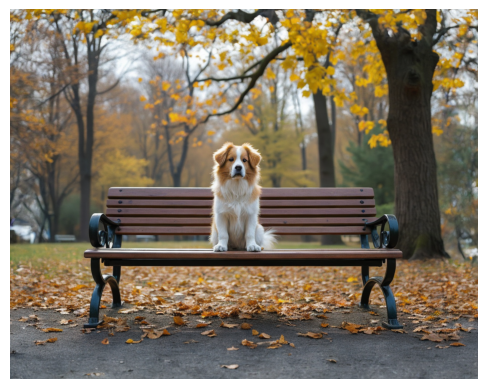

In [22]:
image = cv2.imread('./output2.png')
plot_image(image)
